In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls', sheet_name=3,encoding='euc-kr')
df.shape
df

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2019-05,1호선,150.0,서울역,"1,148",21,"11,958","10,579","15,684","61,286",...,"22,083","4,127","7,762",3,548,0,0,0,0,2019-06-03 10:56:25
2,2019-05,1호선,151.0,시청,89,5,"2,843","4,674","4,169","24,963",...,"4,767",931,"1,426",1,25,0,0,0,0,2019-06-03 10:56:25
3,2019-05,1호선,152.0,종각,116,3,"4,576","5,233","4,780","33,366",...,"5,882","3,973","1,565",1,1,0,0,0,0,2019-06-03 10:56:25
4,2019-05,1호선,153.0,종로3가,216,16,"5,505","3,036","4,790","16,235",...,"6,715","3,375","2,753",1,37,0,1,0,0,2019-06-03 10:56:25
5,2019-05,1호선,154.0,종로5가,51,3,"2,245","4,205","3,415","19,150",...,"3,661",810,"1,200",0,6,0,0,0,0,2019-06-03 10:56:25
6,2019-05,1호선,155.0,동대문,776,12,"17,333","2,452","12,614","9,043",...,"14,421","1,199","5,052",1,68,0,0,0,0,2019-06-03 10:56:25
7,2019-05,1호선,156.0,신설동,315,38,"11,021","2,103","11,002","9,714",...,"13,402",681,"3,383",0,39,0,0,0,0,2019-06-03 10:56:25
8,2019-05,1호선,157.0,제기동,360,6,"5,600","2,439","10,512","10,759",...,"9,194",393,"2,120",0,0,0,0,0,0,2019-06-03 10:56:25
9,2019-05,1호선,158.0,청량리(서울시립대입구),"1,430",9,"13,965","3,611","19,600","13,875",...,"20,670",547,"6,585",0,2,0,1,0,0,2019-06-03 10:56:25


In [89]:
df0 = df.drop(0) #0번 행을 버려라

출근 시간대에 사람들이 많이 타고 내리는 역은 어딜까?
 - 출근 시간대는 언제인가? 새벽~ 오전 9시
 - 상위 10개 역 : 정렬해서 큰 수 10개를 자른다(mask 로 조건부 검색)
 - 타는 역 / 내리는 역

<BarContainer object of 2 artists>

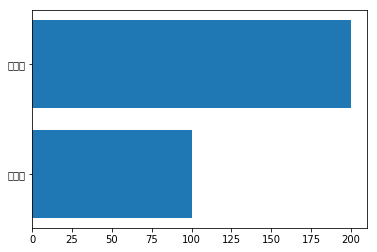

In [90]:
plt.barh(['서울역','강남역'], [100,200])

출근 시간대에 사람들이 많이 타고 내리는 역은 어딜까?
 - 출근 시간대는 언제인가? 새벽~ 오전 9시
 - 상위 10개 역 : 정렬해서 큰 수 10개를 자른다(mask 로 조건부 검색)
 - 타는 역 / 내리는 역

In [91]:
df.columns
출근시간시작위치 = 4
출근시간끝위치 = 13
df0 = df0.replace(',','', regex=True)
arr = np.array(df0)
arr.shape


(597, 53)

In [103]:
역이름 = arr[:,3]
역별승차인원 = arr[:, 출근시간시작위치: 출근시간끝위치:2].astype(np.int)
역별하차인원 = arr[:, 1+출근시간시작위치:1+출근시간끝위치:2].astype(np.int)
역별승차인원합 = np.sum(역별승차인원, axis=1)
역별하차인원합 = np.sum(역별하차인원, axis=1)
역별승차인원[0], 역별하차인원[0]

(array([ 1148, 11958, 15684, 44585, 89357]),
 array([    21,  10579,  61286, 115354, 238583]))

In [99]:
k=10 
threshold = np.sort(역별승차인원합)[-k]
threshold

382801

In [107]:
mask = 역별승차인원합 >=threshold
역별하차인원합[mask], 역이름[mask]

(array([374685, 150637, 149879, 397532, 221675,  95938,  65515, 110080,
         65234,  52712]),
 array(['잠실(송파구청)', '서울대입구(관악구청)', '신림', '구로디지털단지', '신도림', '연신내', '쌍문',
        '수유(강북구청)', '화곡', '까치산'], dtype=object))

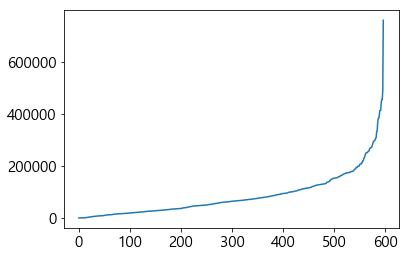

In [114]:
plt.rc('font', family='Malgun Gothic' ,size=15)
m = plt.plot(np.sort(역별승차인원합))

<BarContainer object of 10 artists>

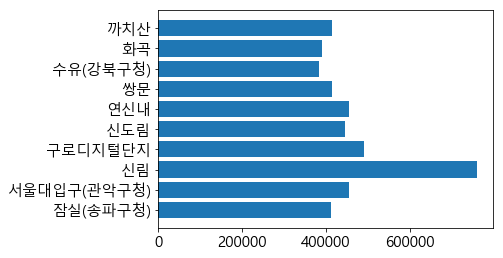

In [119]:
plt.barh(역이름[mask], 역별승차인원합[mask])

In [133]:
df.columns
밤11시시작위치 = -11
밤11시승차인원 = arr[:,밤11시시작위치].astype(np.int)


In [141]:
k=10
threshold = np.sort(밤11시승차인원)[-k]
mask = 밤11시승차인원 >= threshold
max_v= np.argmax(arr[:,-11].astype(np.int))
arr[max_v,3]

'홍대입구'

<BarContainer object of 10 artists>

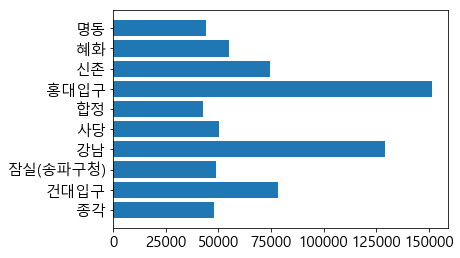

In [142]:
plt.barh(역이름[mask], 밤11시승차인원[mask])

밤 11시에 사람들이 가장 많이 타는 역은 어디일까요? 오늘의 마지막 과제하고 git 업로드